In [708]:
import numpy as np
import pandas as pd

In [709]:
df=pd.read_csv("car data.csv")


**INFO** 

as you can see from the info, 5 numeric feature, 4 object, no missing value

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [711]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [712]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

**UNIQUE:**

here we can see Owner is integer but has only 3 category 


In [713]:
df["Fuel_Type"].unique(), df["Seller_Type"].unique(), df["Transmission"].unique(), df["Owner"].unique()

(array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array([0, 1, 3]))

In [714]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

**PAIRPLOT**

HERE WE CAN SEE THAT PLOTS ARE HIGHLY SKEWED, SO IN MY NEXT STEP I M CHECKING SKEWNESS

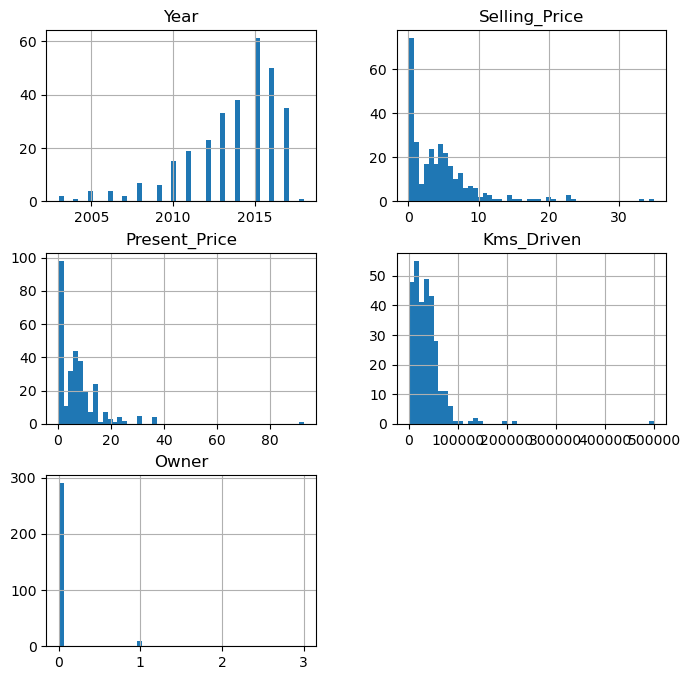

In [715]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(8,8))
plt.show()

In [716]:
from scipy.stats import skew
print(f"skewness_Present_Price: {skew(df['Present_Price'])}\n"
      f"skewness_Selling_Price: {skew(df['Selling_Price'])}\n"
      f"skewness_Kms_Driven: {skew(df['Kms_Driven'])}\n"
      f"skewness_Year: {skew(df['Year'])}")


skewness_Present_Price: 4.062773999428537
skewness_Selling_Price: 2.480979484005291
skewness_Kms_Driven: 6.403895025283172
skewness_Year: -1.2399702494847509


In [717]:
df["Owner"].value_counts()  #Diagramm shows that category 3 of owner has low value... here we find out that 3 category has 1 value

Owner
0    290
1     10
3      1
Name: count, dtype: int64

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

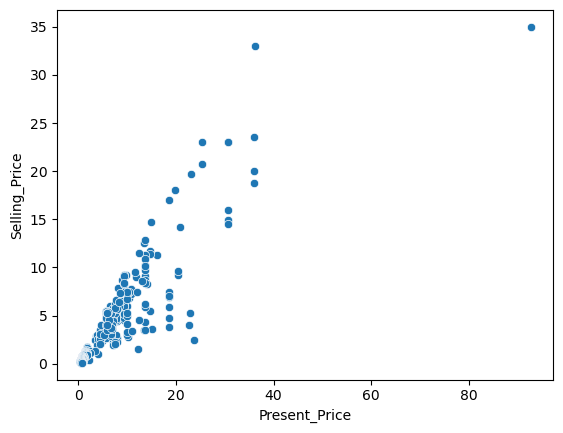

In [718]:
sns.scatterplot(data=df, x="Present_Price", y="Selling_Price")

In [719]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

<Axes: xlabel='Selling_Price', ylabel='Year'>

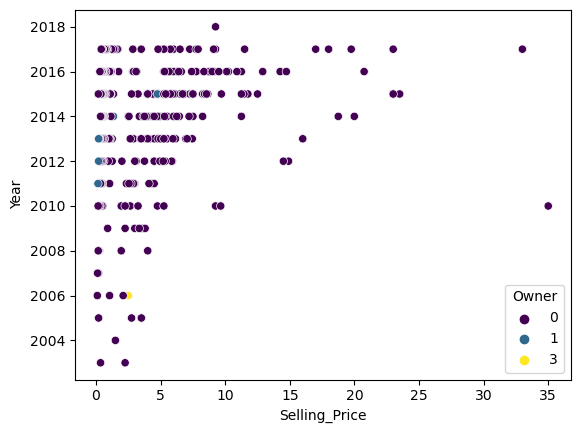

In [720]:
sns.scatterplot(data=df, y="Year", x="Selling_Price", hue="Owner", alpha=1, palette="viridis")

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

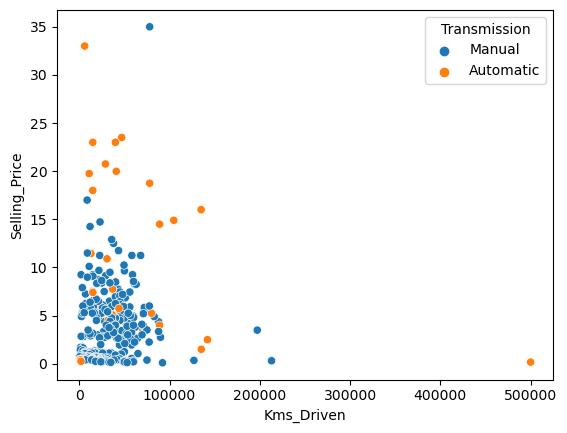

In [721]:
sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Transmission")

In [722]:
# Import necessary libraries
!pip install cufflinks
import cufflinks as cf
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Cufflinks for offline use
cf.go_offline()

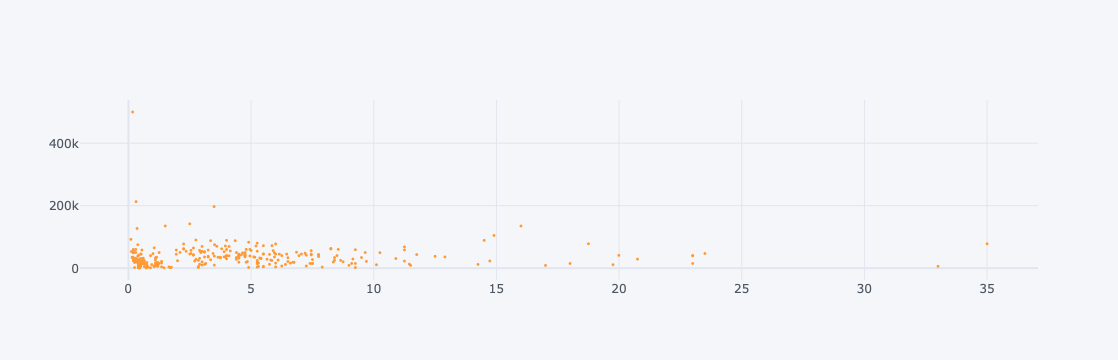

In [723]:
df.iplot(kind='scatter', y="Kms_Driven", x="Selling_Price", mode='markers', size=3)

In [724]:
corr_matrix= df.corr(numeric_only=True)
corr_matrix

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<Axes: >

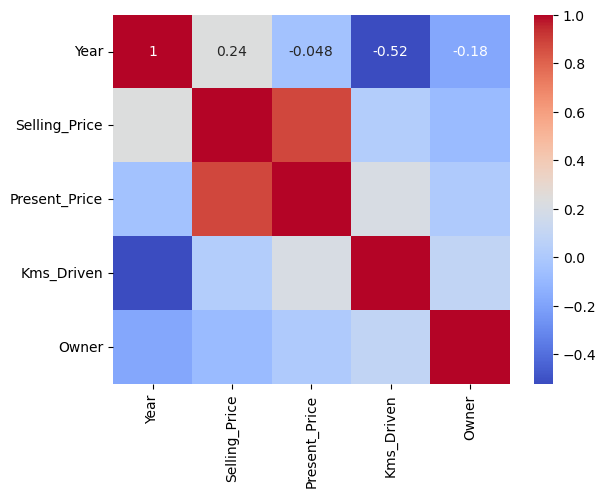

In [725]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

<Axes: xlabel='Owner', ylabel='Selling_Price'>

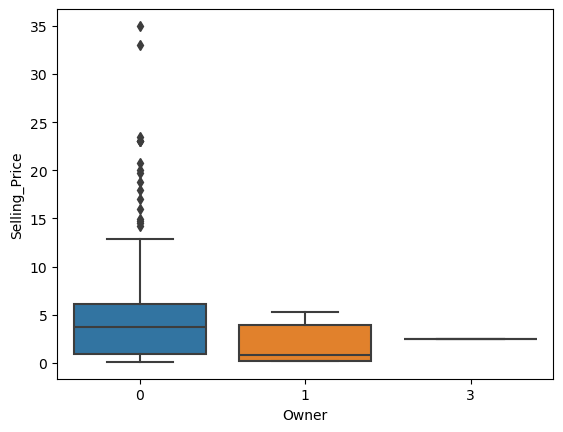

In [726]:
sns.boxplot(data=df, x='Owner', y='Selling_Price')

<Axes: xlabel='Owner', ylabel='Selling_Price'>

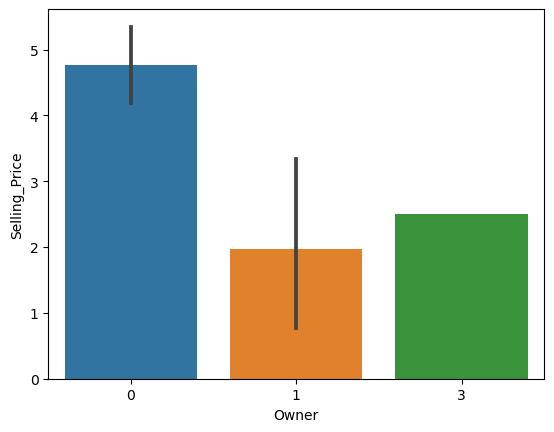

In [727]:
sns.barplot(data=df, x='Owner', y='Selling_Price')

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

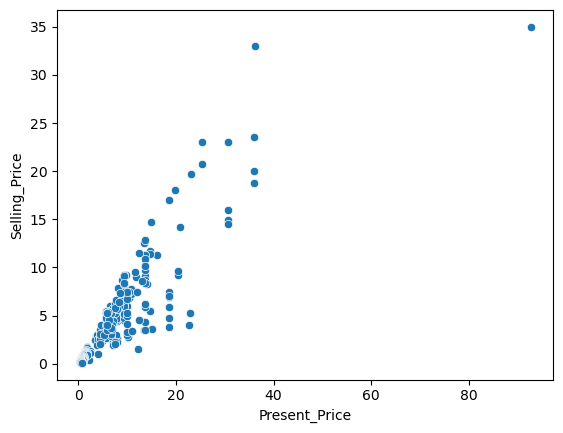

In [728]:

sns.scatterplot(df[df['Owner'] == 0], x="Present_Price", y="Selling_Price")

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

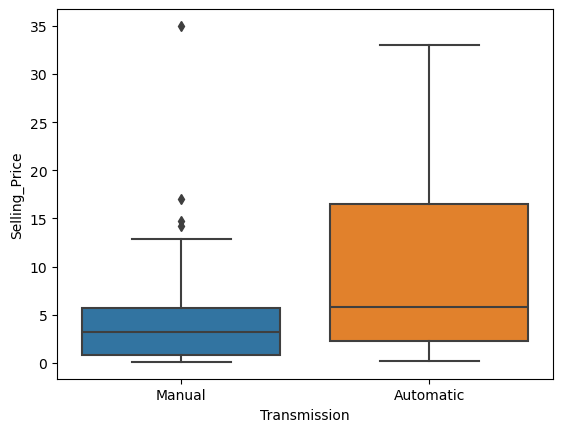

In [729]:
sns.boxplot(data=df, y="Selling_Price", x="Transmission")

<Axes: xlabel='Selling_Price', ylabel='Seller_Type'>

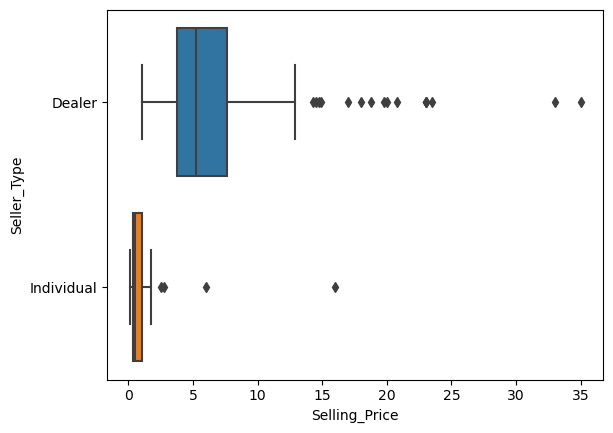

In [730]:
sns.boxplot(data=df, x="Selling_Price", y="Seller_Type")

In [731]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

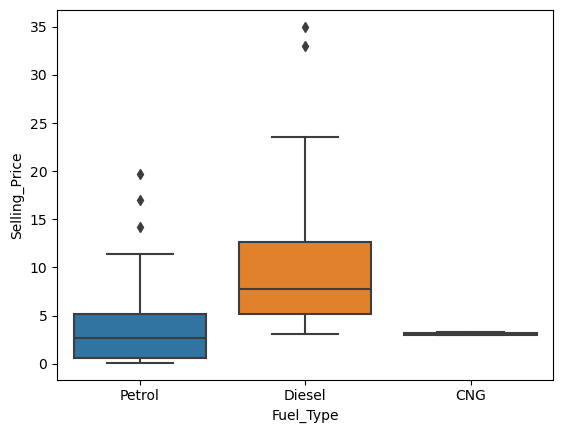

In [732]:

sns.boxplot(data=df, y="Selling_Price", x="Fuel_Type")

In [733]:
#From correlation matrix we can see that two most important feature from correlation are year, and present price..f["car.. year is important as it tells the age of the carr
df["car_age"]= max(df["Year"])- df["Year"]

In [734]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [735]:
bins=[0,3,5,8,10,13,15]
labels=['New', 'NO', 'Old','p','r','t']
df["car_age_category"]=pd.cut(df["car_age"], bins=bins, labels=labels)

bins=[0,3,5,10,15,20,25,27,30,33,35,45,93]
labels=['1','2','3','4','5','6','7','8','9','10','11','12']
df["Present_Price_cat"]=pd.cut(df["Present_Price"], bins=bins, labels=labels)

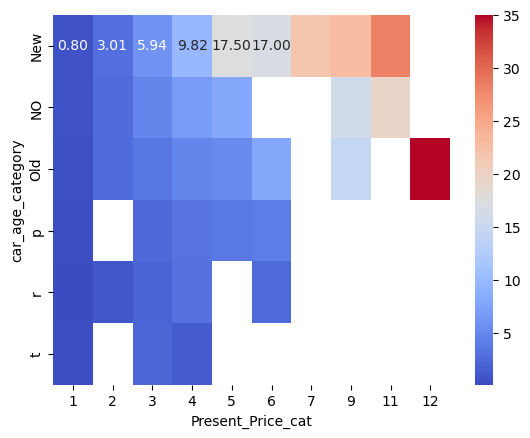

In [736]:
pivoted_table=df.pivot_table(values="Selling_Price", 
                             index="car_age_category", 
                             columns="Present_Price_cat",
                             aggfunc='mean')
sns.heatmap(pivoted_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



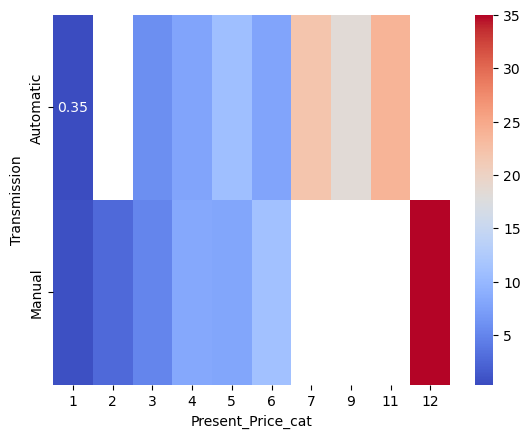

In [737]:
pivoted_table=df.pivot_table(values="Selling_Price", 
                             index="Transmission", 
                             columns="Present_Price_cat",
                             aggfunc='mean')
sns.heatmap(pivoted_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

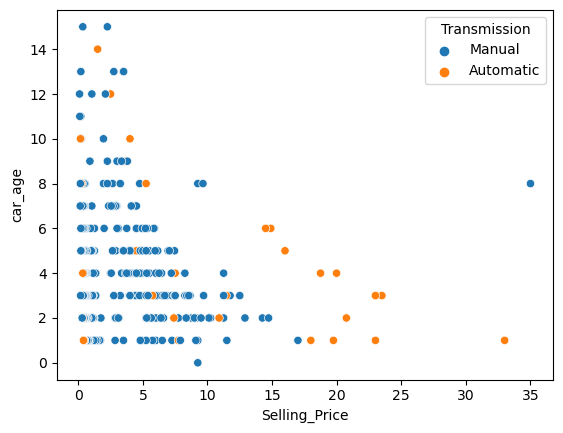

In [738]:
pivoted_table=df.pivot_table(values="Selling_Price", 
                             columns="Transmission", 
                             index="car_age_category")
sns.scatterplot(data=df, x="Selling_Price", y="car_age", hue="Transmission")
plt.show()

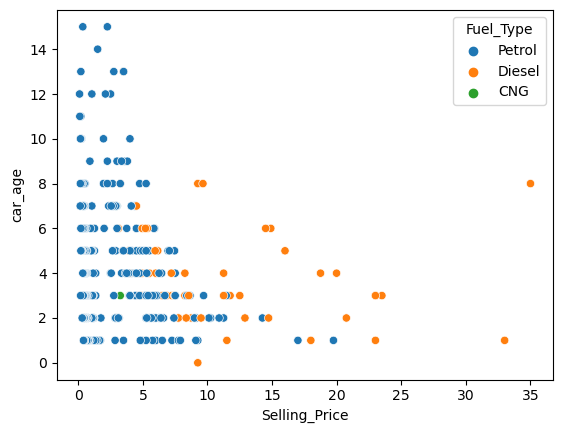

In [739]:

sns.scatterplot(data=df, x="Selling_Price", y="car_age", hue="Fuel_Type")
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

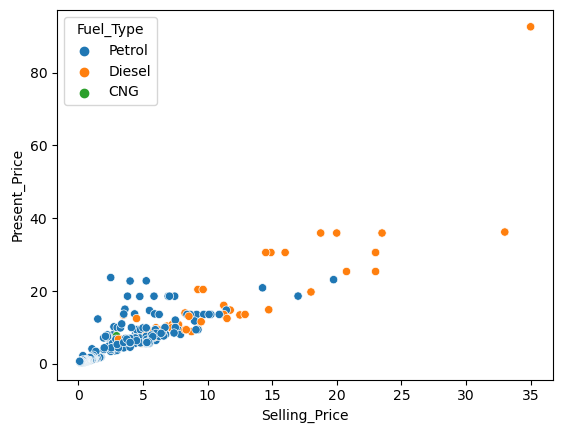

In [740]:

sns.scatterplot(data=df, x="Selling_Price", y="Present_Price", hue="Fuel_Type")


In [741]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

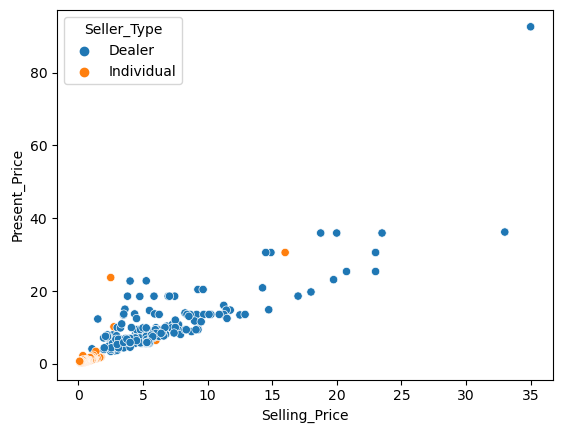

In [742]:

sns.scatterplot(data=df, x="Selling_Price", y="Present_Price", hue="Seller_Type")

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Car_Name           301 non-null    object  
 1   Year               301 non-null    int64   
 2   Selling_Price      301 non-null    float64 
 3   Present_Price      301 non-null    float64 
 4   Kms_Driven         301 non-null    int64   
 5   Fuel_Type          301 non-null    object  
 6   Seller_Type        301 non-null    object  
 7   Transmission       301 non-null    object  
 8   Owner              301 non-null    int64   
 9   car_age            301 non-null    int64   
 10  car_age_category   300 non-null    category
 11  Present_Price_cat  301 non-null    category
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 24.8+ KB


In [744]:
from zlib import crc32
def is_data_in_test(identifier, test_ratio):
    return crc32(np.int64(identifier).tobytes()) < test_ratio * 2**32

# Function to split the data into train and test sets
def split_data(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_data_in_test(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
df['index'] = df.index
df = df.reset_index(drop=True)
# Split data
train_set, test_set = split_data(df, 0.2, "index")


In [745]:
 df1_train=train_set.drop(["Year","car_age_category","Present_Price_cat", "Owner", "Car_Name", "index"], axis=1)
df1_test= test_set.drop(["Year","car_age_category","Present_Price_cat", "Owner", "Car_Name", "index"], axis=1)

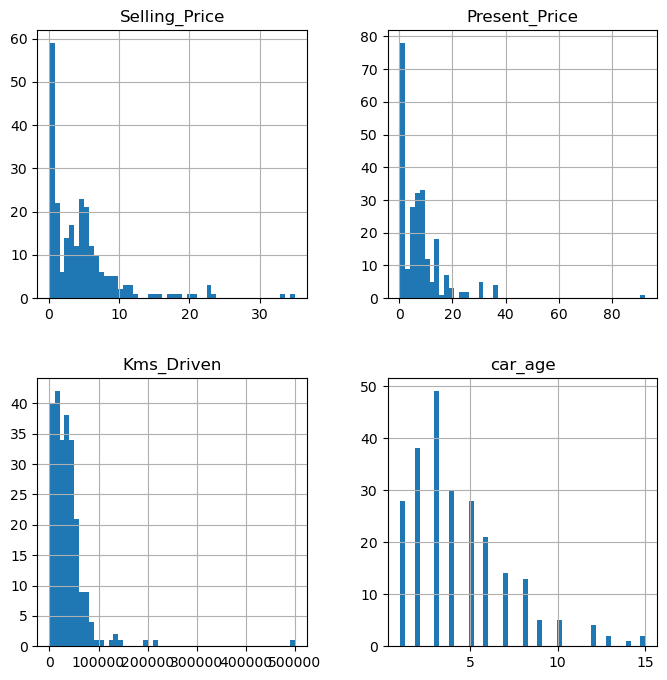

In [746]:
df1.hist(bins=50, figsize=(8,8))
plt.show() #rightskew

In [747]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2 to 297
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  61 non-null     float64
 1   Present_Price  61 non-null     float64
 2   Kms_Driven     61 non-null     int64  
 3   Fuel_Type      61 non-null     object 
 4   Seller_Type    61 non-null     object 
 5   Transmission   61 non-null     object 
 6   car_age        61 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.8+ KB


In [748]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  240 non-null    float64
 1   Present_Price  240 non-null    float64
 2   Kms_Driven     240 non-null    int64  
 3   Fuel_Type      240 non-null    object 
 4   Seller_Type    240 non-null    object 
 5   Transmission   240 non-null    object 
 6   car_age        240 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 15.0+ KB


In [749]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline= make_pipeline(
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler())
cat_pipeline=make_pipeline(
    OneHotEncoder())

preprocessing=ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include="number")),
    ("cat", cat_pipeline, make_column_selector(dtype_include="object"))
])

In [750]:
car=df1_train.drop(["Selling_Price"], axis=1)
car_target=df1_train["Selling_Price"]

In [751]:
from sklearn.linear_model import LinearRegression

lin_reg=make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(car, car_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ad1890>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ac1d50>)])),
                ('linearregression', LinearRegression())])

In [752]:
lin_pred=lin_reg.predict(car)

In [753]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(car_target, lin_pred)
mse=np.sqrt(mse1)

In [754]:
mse

2.376304676848681

In [755]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_regq=make_pipeline(preprocessing, PolynomialFeatures(degree=2),LinearRegression())
lin_regq.fit(car, car_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ad1890>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ac1d50>)])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [756]:
lin_predq=lin_regq.predict(car)

In [757]:
from sklearn.metrics import mean_squared_error
mse1q=mean_squared_error(car_target, lin_predq)
mseq=np.sqrt(mse1q)

In [758]:
mseq

0.7976875259561179

In [759]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(car, car_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ad1890>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ac1d50>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [760]:
tree_pred=tree_reg.predict(car)

In [761]:
mset1=mean_squared_error(tree_pred, car_target)
mset=np.sqrt(mset1)
mset

6.206335383118182e-18

In [762]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing, RandomForestRegressor())
forest_reg.fit(car, car_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ad1890>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ac1d50>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [763]:
forest_pred=forest_reg.predict(car)

In [764]:
msef1=mean_squared_error(forest_pred, car_target)
msef=np.sqrt(msef1)
msef

0.5926284244786103

In [765]:

x_test=df1_test.drop(["Selling_Price"], axis=1)
y_test=df1_test["Selling_Price"]

In [766]:
forest_predt=forest_reg.predict(x_test)

In [767]:
msef1t=mean_squared_error(forest_predt, y_test)
mseft=np.sqrt(msef1t)
mseft

0.8456783032707832

In [768]:
from sklearn.metrics import r2_score
final_r2 = r2_score(y_test, forest_predt)
final_r2

0.9575084817663176

In [769]:
lin_predqt=lin_regq.predict(x_test)

In [770]:
mse2t1=mean_squared_error(lin_predqt, y_test)
mse2t=np.sqrt(mse2t1)
mse2t

0.8648871236282921

In [771]:
lin_predl=lin_reg.predict(x_test)
msel1=mean_squared_error(lin_predt, y_test)
msel=np.sqrt(msel1)
msel

0.8648871236282921

In [772]:
from sklearn.metrics import r2_score
final_r2 = r2_score(y_test, lin_predt)
final_r2

0.9555562460366795

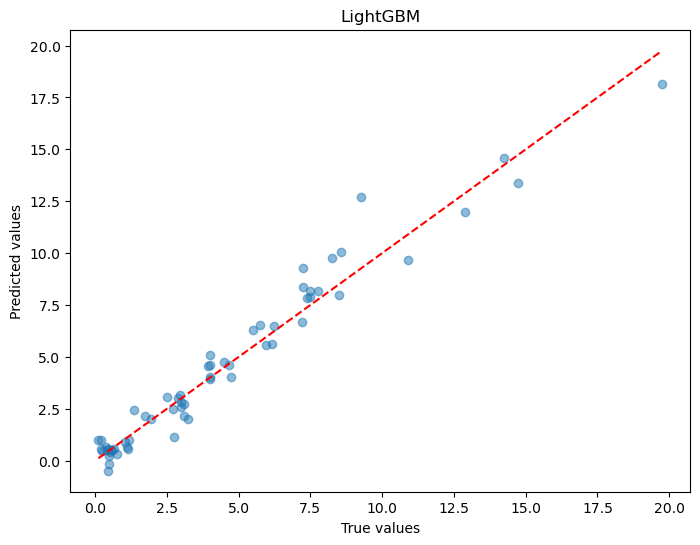

In [773]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_predt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LightGBM')
plt.show()

In [774]:
car1=train_set.drop(["Selling_Price", "Car_Name","index"], axis=1)
car_target1=train_set["Selling_Price"]

In [775]:
from sklearn.linear_model import LinearRegression

lin_regn=make_pipeline(preprocessing, LinearRegression())
lin_regn.fit(car1, car_target1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ad1890>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x289ac1d50>)])),
                ('linearregression', LinearRegression())])

In [776]:
x_testn=test_set.drop(["Selling_Price", "Car_Name","index"], axis=1)
y_testn=test_set["Selling_Price"]

In [777]:
lin_predn=lin_regn.predict(x_testn)

In [778]:

msen1=mean_squared_error(lin_predn, y_test)
msen=np.sqrt(msen1)
msen

2.0258280822360595

In [779]:
from sklearn.metrics import r2_score
final_r2n = r2_score(y_test, lin_predn)
final_r2n

0.7561644375486084